In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [2]:
from utils.latticeeasy import *
from utils.gmon import get_mass

In [3]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 9})
rc('text', usetex=True)
rc('image', cmap='gist_heat_r')
rc('axes', **{'titlesize': 9})

plt.rcParams['axes.axisbelow'] = True

from mpl_toolkits.axes_grid1 import make_axes_locatable, ImageGrid

# Save dir

In [4]:
save_dir = "images_for_paper"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Load data

This plots the data for 3 subfigures (3 rows) with 3 axes (3 columns) each.

All plots need NxN data (probably in np.ndarray form).
I have Edens here but obviously you can use it for anything.

In [6]:
alpha = 0.05
beta = 25
domain_width_pr = np.array([1.378565, 1.378565, 1.378565])
rescale_B = 2.8019852063808336e-06
    
domain_width = np.array(domain_width_pr)/rescale_B*get_mass(alpha,beta)
L = domain_width[0]

In [7]:
"""
Load saved data.
"""

output_dir = "data/"

osc_cr = pickle.load(open(os.path.join(output_dir,"cropped oscillon.p"),"rb"))
osc_in = pickle.load(open(os.path.join(output_dir,"interpolated oscillon.p"),"rb"))
mask_init = pickle.load(open(os.path.join(output_dir,"mask init.p"),"rb"))
mask = pickle.load(open(os.path.join(output_dir,"mask.p"),"rb"))

In [8]:
"""
Define the color range for each subplot so axes can share a colorbar.
One for each row.
"""

vmax = max(osc_cr.max(),osc_in.max())
vmin = min(osc_cr.min(),osc_in.min())

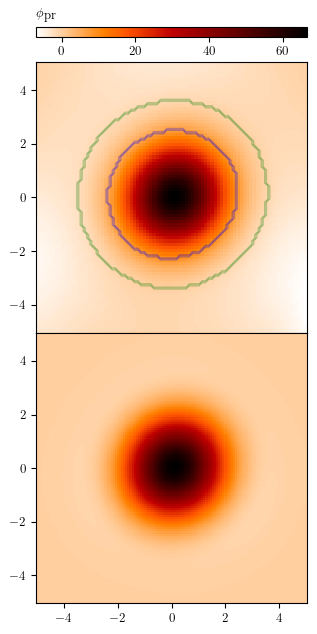

In [9]:
fig = plt.figure(figsize=(3.5,10))



grid = ImageGrid(fig, 111,
                 nrows_ncols = (2,1),
                 axes_pad = 0,
                 cbar_location = "top",
                 cbar_mode="edge",
                 cbar_size=.1,
                 cbar_pad=0.25,
                )

domain_grid = np.linspace(0,L,84)
mesh = grid[0].pcolormesh(domain_grid-L/2,domain_grid-L/2,osc_cr.T,vmin=vmin,vmax=vmax,
                          # cmap=new_cmap
                         )

grid[0].contour(domain_grid-L/2, domain_grid-L/2 ,mask_init,colors='blue',linewidths=.1)
grid[0].contour(domain_grid-L/2, domain_grid-L/2 ,mask,colors='g',linewidths=.1)

domain_grid = np.linspace(0,L,128)
grid[1].pcolormesh(domain_grid-L/2,domain_grid-L/2,osc_in.T,vmin=vmin,vmax=vmax,
                   # cmap=new_cmap
                  )

    
    # for j in range(3):
        
    #     ax = grid[j]
    
    #     mesh = ax.pcolormesh(domain_grid-L/2,domain_grid-L/2,Edens_list[i][j][:,128].T/Edens_mean_list[i],vmax=vmax_list[i])
    #     # ^ Edens_list[i][j].T, the .T transposes the array.
    #     ax.set_aspect(1)
    #     if j>0:
    #         ax.get_yaxis().set_visible(False)
        
    #     ax.text(L/32-L/2,L*12.5/16-L/2,r"$t_{\textrm{pr}}$ = "+f'{data.t[plot_timeslices[i][j]]}')
    #     ax.set_ylim(L/8-L/2,L*7/8-L/2)
        
cbar = fig.colorbar(mesh, cax=grid.cbar_axes[0], orientation='horizontal')
cbar.ax.set_title(r"$\phi_{\textrm{pr}}$",loc="left")
    
# plt.savefig(os.path.join(save_dir,f"extracted oscillon.png"),dpi=400,facecolor='w',bbox_inches='tight')
plt.show()

In [18]:
import matplotlib.colors as colors
import matplotlib
from matplotlib.colors import ListedColormap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n1=1000, n2=1000):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.concatenate([np.linspace(0, minval, n1),np.linspace(minval, maxval, n2)])))
    return new_cmap

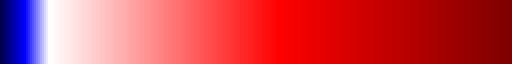

In [19]:
# new_cmap = truncate_colormap(plt.get_cmap("RdBu_r"), vmin/vmax/2+.5, 1)
maxval = int(vmax/(vmax-vmin)*1000)
minval = 1000-maxval
new_cmap = truncate_colormap(plt.get_cmap("seismic"), 0.5, 1, minval,maxval)
new_cmap